<a href="https://colab.research.google.com/github/SaurabhChadda/Portfolio-Projects/blob/main/MavenFactory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/mount')

Mounted at /content/mount


In [ ]:
## Here I'm importing all the important packages that I'll be using in this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date

In [ ]:
## In this step I'm importing all the different datasets from the google drive.

customers=pd.read_csv("/content/mount/MyDrive/maven_data_project/MavenMarket_Customers.csv")
product=pd.read_csv("/content/mount/MyDrive/maven_data_project/MavenMarket_Products.csv")
region=pd.read_csv("/content/mount/MyDrive/maven_data_project/MavenMarket_Regions.csv")
returns=pd.read_csv("/content/mount/MyDrive/maven_data_project/MavenMarket_Returns_1997-1998.csv")
stores=pd.read_csv("/content/mount/MyDrive/maven_data_project/MavenMarket_Stores.csv")
transactions_1997=pd.read_csv("/content/mount/MyDrive/maven_data_project/MavenMarket_Transactions_1997.csv")
transactions_1998=pd.read_csv("/content/mount/MyDrive/maven_data_project/MavenMarket_Transactions_1998.csv")

In [ ]:
## In this step I'm using info() method to check the metadata about the each dataset and find and fix if there is any errors in the datatypes that we need to fix before
## diving into analysis process.
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10281 entries, 0 to 10280
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   customer_id              10281 non-null  int64 
 1   customer_acct_num        10281 non-null  int64 
 2   first_name               10281 non-null  object
 3   last_name                10281 non-null  object
 4   customer_address         10281 non-null  object
 5   customer_city            10281 non-null  object
 6   customer_state_province  10281 non-null  object
 7   customer_postal_code     10281 non-null  int64 
 8   customer_country         10281 non-null  object
 9   birthdate                10281 non-null  object
 10  marital_status           10281 non-null  object
 11  yearly_income            10281 non-null  object
 12  gender                   10281 non-null  object
 13  total_children           10281 non-null  int64 
 14  num_children_at_home     10281 non-nul

In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1560 non-null   int64  
 1   product_brand         1560 non-null   object 
 2   product_name          1560 non-null   object 
 3   product_sku           1560 non-null   int64  
 4   product_retail_price  1560 non-null   float64
 5   product_cost          1560 non-null   float64
 6   product_weight        1560 non-null   float64
 7   recyclable            1560 non-null   float64
 8   low_fat               1560 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 109.8+ KB


In [ ]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   region_id       109 non-null    int64 
 1   sales_district  109 non-null    object
 2   sales_region    109 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.7+ KB


In [ ]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7087 entries, 1997-01-01 to 1998-12-30
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   product_id  7087 non-null   int64
 1   store_id    7087 non-null   int64
 2   quantity    7087 non-null   int64
 3   year        7087 non-null   int64
dtypes: int64(4)
memory usage: 276.8 KB


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   store_id              24 non-null     int64         
 1   region_id             24 non-null     int64         
 2   store_type            24 non-null     object        
 3   store_name            24 non-null     object        
 4   store_street_address  24 non-null     object        
 5   store_city            24 non-null     object        
 6   store_state           24 non-null     object        
 7   store_country         24 non-null     object        
 8   store_phone           24 non-null     object        
 9   first_opened_date     24 non-null     datetime64[ns]
 10  last_remodel_date     24 non-null     datetime64[ns]
 11  total_sqft            24 non-null     int64         
 12  grocery_sqft          24 non-null     int64         
dtypes: datetime64[ns](2), 

In [ ]:
transactions_1997.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86837 entries, 0 to 86836
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_date  86837 non-null  object
 1   stock_date        86837 non-null  object
 2   product_id        86837 non-null  int64 
 3   customer_id       86837 non-null  int64 
 4   store_id          86837 non-null  int64 
 5   quantity          86837 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 4.0+ MB


In [ ]:
## In this step I'm calculating the number of married or single  customers in each gender for this I'm grouping the data on the basis of marital status and gender.

married_single=customers.loc[:,['marital_status','gender','customer_id']].groupby(['marital_status','gender']).count().\
rename({'customer_id':'Total_customers'},axis=1)
married_single

Total_customers
marital_status gender                 
M              F                  2575
               M                  2567
S              F                  2522
               M                  2617

In [ ]:
## Let's fetch the details regarding the demographic distribution of our customers on the basis of there gender.
## Result : We can clearly see that there is very minimum difference we have male customers upto 50.42% and female customers of 49.58%

demographic_analysis=customers.loc[:,['gender','customer_id']].groupby(['gender']).count().\
rename({'customer_id':'Total_customers'},axis=1)
demographic_analysis['Percent']=demographic_analysis.assign(Percent=lambda x : x.Total_customers/x.Total_customers.sum()*100).round(2).loc[:,'Percent'].astype(str)+'%'
demographic_analysis

,Total_customers,Percent
gender,,
F,5097,49.58%
M,5184,50.42%


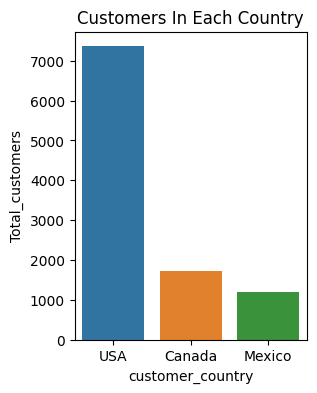

In [ ]:
## Let's check majority of customeres comes from which country and where the business needs to imporove
## Result : We can clearly see that the majority of customers are from USA and least number of customers are from Mexico after canada
## To plot this data I'm using seaborn barplot it provides us the clear visulization of the data.

customers_country=customers.loc[:,['customer_country','customer_id']].groupby('customer_country').count().\
sort_values(by='customer_id',ascending=False).rename({'customer_id':'Total_customers'},axis=1)
customers_country=customers_country.reset_index()
fig, ax = plt.subplots(figsize=(3, 4))
sns.barplot(data=customers_country,x='customer_country',y='Total_customers')
plt.title('Customers In Each Country')
plt.show()

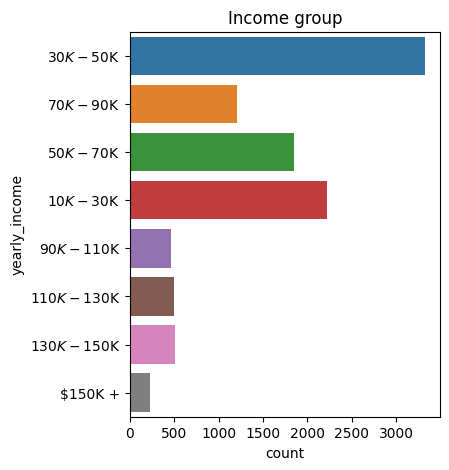

In [ ]:
## Let's check majority of customers fall's in which income category
## Result : To visualize this data I'm using a countplot to count the frequency of each customer falling into different income groups
## From the plot we can clearly see that the majority of the customers falls into the pay scale of 30k-50k

fig, ax = plt.subplots(figsize=(4, 5))
sns.countplot(data=customers,y=customers['yearly_income'])
plt.title('Income group')
plt.show()

In [ ]:
## In this step I'm replacing the NAN values with 0 it will create a binary series for us ie. when the item is recyclable it will be represented by 1
## and when it's not recyclable it will represented by 0.

product['recyclable']=product.recyclable.fillna(0)

In [ ]:
## Performing the same above steps here for the low fat and high fat products if the product is high fat it will be represented by 1 and if it's low fat
## it will be represented by 0.

product['low_fat']=product.low_fat.fillna(0)

In [ ]:
## let's check what percentage of total products are recyclable products and non recyclable products
## Result : Here we can clearly see that upto 55.96% of the products are recyclable and 44.04% is not recyclable

recyclable_percent=product.loc[:,['recyclable','product_id']].groupby('recyclable').count().\
rename({'product_id':'Total_products'},axis=1)

recyclable_percent=recyclable_percent.assign(Percentage=lambda x : x.Total_products/x.Total_products.sum()*100).round(2)
recyclable_percent['Percentage']=recyclable_percent.Percentage.astype(str) + '%'
recyclable_percent


,Total_products,Percentage
recyclable,,
0.0,687,44.04%
1.0,873,55.96%


In [ ]:
## Let's check what is the percentage of low_fat and high_fat products
## Result : I'll be using the same approach that we followed above and we can clearly see that there is upto 64.62% which fall under low fat category and 35.38% of products
##  which falls under high fat product category.

lowfat_percent=product.loc[:,['low_fat','product_id']].groupby('low_fat').count().\
rename({'product_id':'Total_products'},axis=1)

lowfat_percent['Percentage']=(lowfat_percent.Total_products/lowfat_percent.Total_products.sum()*100).round(2).astype(str) + '%'
lowfat_percent

,Total_products,Percentage
low_fat,,
0.0,1008,64.62%
1.0,552,35.38%


In [ ]:
## In this step I'm combining the fact table (transactions table) for the year 1997 and 1998 this will give us a consolidated picture of the business and the data regarding
## the sales over the years.

total_transactions=transactions_1997.append(transactions_1998,ignore_index=True)

<ipython-input-12-0f69d646d9af>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_transactions=transactions_1997.append(transactions_1998,ignore_index=True)


In [ ]:
## Let's check the level of correlation between different variables in the total transactions
total_transactions.corr(numeric_only=True)

,product_id,customer_id,store_id,quantity,Year
product_id,1.000000,0.006621,-0.001764,0.000243,-0.002858
customer_id,0.006621,1.000000,0.003311,0.002250,-0.004332
store_id,-0.001764,0.003311,1.000000,0.021089,-0.044677
quantity,0.000243,0.002250,0.021089,1.000000,0.014918
Year,-0.002858,-0.004332,-0.044677,0.014918,1.000000


In [ ]:
## Here I'm converting the transaction date from string datatype to numpy datetime datatype it will help us make more advance analysis using dates amd different parameters

total_transactions['transaction_date']=total_transactions.transaction_date.astype(np.datetime64)

In [ ]:
## In this step I'm creating a new index on the basis of transactions date it will help us in segmenting the data

total_transactions.set_index('transaction_date',inplace=True)
total_transactions['Year']=total_transactions.index.year

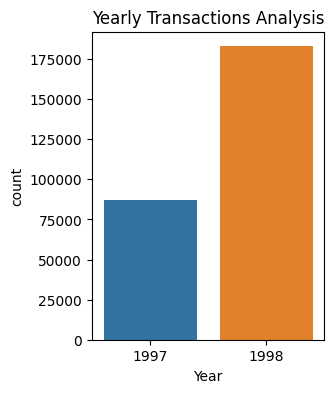

In [ ]:
## Let's count the total transactions in each year for this I'm using seaborn package and count plot
## Result : We can clearly see here that there is good growth in the number of transactions from 1997 to 1998.

fig, ax = plt.subplots(figsize=(3, 4))
sns.countplot(total_transactions,x='Year')
plt.title('Yearly Transactions Analysis')
plt.show()

In [ ]:
## In this step I'm joining the total_transactions table with the products table to get the better insight regarding which product is performing better and where the company
## has to improve.

profit_analysis=pd.merge(total_transactions,product,'left').loc[:,['product_brand','Year','product_cost','product_retail_price','quantity']].\
  assign(total_cost=lambda x:x.product_cost*x.quantity).assign(total_revenue=lambda x :x.product_retail_price*x.quantity).\
  assign(net_profit=lambda x:x.total_revenue-x.total_cost).sort_values(by='net_profit',ascending=False)

profit_analysis.head(5)

,product_brand,Year,product_cost,product_retail_price,quantity,total_cost,total_revenue,net_profit
185183,Tell Tale,1998,1.14,3.68,6,6.84,22.08,15.24
81034,Hermanos,1997,1.62,3.94,6,9.72,23.64,13.92
195710,Best Choice,1998,1.22,3.95,5,6.10,19.75,13.65
148346,Best Choice,1998,1.22,3.95,5,6.10,19.75,13.65
124147,Best Choice,1998,1.22,3.95,5,6.10,19.75,13.65


In [ ]:
## In this step I'm trying to calculate the total percentage of  net profit constituted in each year by the business.
## Result : By looking at the number we can say that there is more than the double growth from the year 1997 to 1998.

profit_yearly=profit_analysis.loc[:,['Year','net_profit']].groupby('Year').sum().round(2).\
              assign(Percentage=lambda x : x.net_profit/x.net_profit.sum()*100).round(2)

profit_yearly['Percentage']=profit_yearly.Percentage.astype(str) + '%'
profit_yearly

,net_profit,Percentage
Year,,
1997,337125.48,32.02%
1998,715693.30,67.98%


In [ ]:
## returns data analysis
## For analysing the returns data I'm performing between returns table and the products table to give us better insights regarding the returned products and it's brand.

returns_data=pd.merge(returns,product,'left').loc[:,['return_date','product_id','quantity','product_brand']]
returns_data['return_date']=returns_data.return_date.astype(np.datetime64)
returns_data

,return_date,product_id,quantity,product_brand
0,1997-01-01,250,1,Best Choice
1,1997-01-01,628,1,Token
2,1997-01-01,869,1,Nationeel
3,1997-01-02,469,1,Red Wing
4,1997-01-02,532,2,Fast
...,...,...,...,...
7082,1998-12-30,1037,2,PigTail
7083,1998-12-30,1048,1,PigTail
7084,1998-12-30,1065,1,Bird Call
7085,1998-12-30,1154,1,Dual City


In [ ]:
## In this step let's fetch the details regarding the top 10 returned products with there brand name and quantities returned.

returns_data.loc[:,['product_brand','quantity']].groupby('product_brand').sum().\
rename({'quantity':'Quantity_returned'},axis=1).sort_values(by='Quantity_returned',ascending=False).head(10)

,Quantity_returned
product_brand,
Hermanos,274
Horatio,240
Tri-State,239
Tell Tale,238
Ebony,223
High Top,222
Nationeel,221
Fast,208
Red Wing,194


In [ ]:
## In this step I'm trying to calculate the returns in each quarter combining both the years

Quarterly_returns=returns_data.set_index('return_date')
Quarterly_returns['Quarter']=Quarterly_returns.index.quarter
Quarterly_returns=Quarterly_returns.groupby('Quarter').sum('quantity').iloc[:,[1]].reset_index()
Quarterly_returns



,Quarter,quantity
0,1,2051
1,2,1946
2,3,1975
3,4,2317


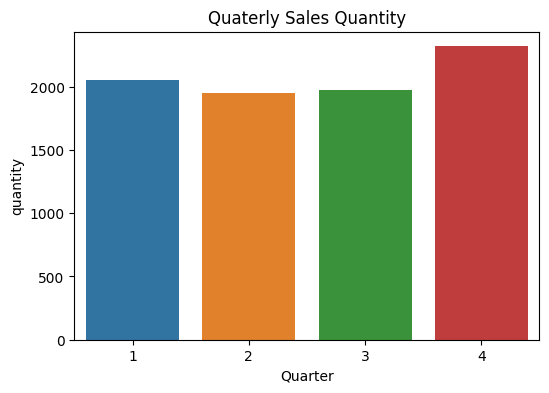

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=Quarterly_returns,x='Quarter',y='quantity')
plt.title('Quaterly Sales Quantity')
plt.show()

In [ ]:
## Store Analysis
## In this step to I'm joining the stores table with the region table to get the better understanding regarding the total number of stores available in different conutries
## and there total branches in a particular region.

store_analysis=pd.merge(stores,region,'inner').loc[:,['store_id','region_id','store_type','store_name','store_country','first_opened_date','last_remodel_date','sales_region']]
store_analysis.head(5)

,store_id,region_id,store_type,store_name,store_country,first_opened_date,last_remodel_date,sales_region
0,1,28,Supermarket,Store 1,Mexico,1/9/1982,12/5/1990,Mexico West
1,2,78,Small Grocery,Store 2,USA,4/2/1970,6/4/1973,North West
2,3,76,Supermarket,Store 3,USA,6/14/1959,11/19/1967,North West
3,4,27,Gourmet Supermarket,Store 4,Mexico,9/27/1994,12/1/1995,Mexico Central
4,5,4,Small Grocery,Store 5,Mexico,9/18/1978,6/29/1991,Mexico West


In [ ]:
## To get better insights regarding the total transactions or quantity sold by stores in different region here I'm merging the store_analysis table that we have formed in a
## previous step and joining it with the total transactions table which consist all the data regarding the sales

store_analysis=pd.merge(total_transactions,store_analysis,'left')

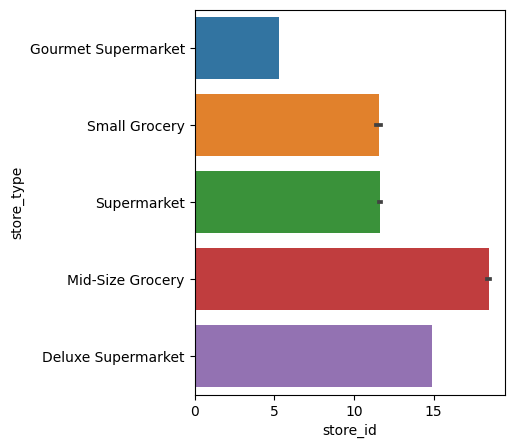

In [ ]:
## In this step I'm creating a graph which represents different type of stores in which our products are sold.

fig, ax = plt.subplots(figsize=(4,5))
store_analysis.loc[:,['store_type','store_id']].groupby('store_type').count().reset_index()
sns.barplot(data=store_analysis,y='store_type',x='store_id')
plt.show()


In [ ]:
## Let's try to fetch details regarding like in which country do we have the maximum number of stores and there types as well.
country_store=store_analysis.loc[:,['store_country','store_type','store_id']].groupby(['store_country','store_type']).count().\
rename({'store_id':'store_count'},axis=1).reset_index()

country_store

,store_country,store_type,store_count
0,Canada,Deluxe Supermarket,12770
1,Canada,Mid-Size Grocery,3321
2,Mexico,Deluxe Supermarket,38566
3,Mexico,Gourmet Supermarket,8267
4,Mexico,Mid-Size Grocery,7286
5,Mexico,Small Grocery,1470
6,Mexico,Supermarket,17217
7,USA,Deluxe Supermarket,49465
8,USA,Gourmet Supermarket,14775
9,USA,Mid-Size Grocery,7107


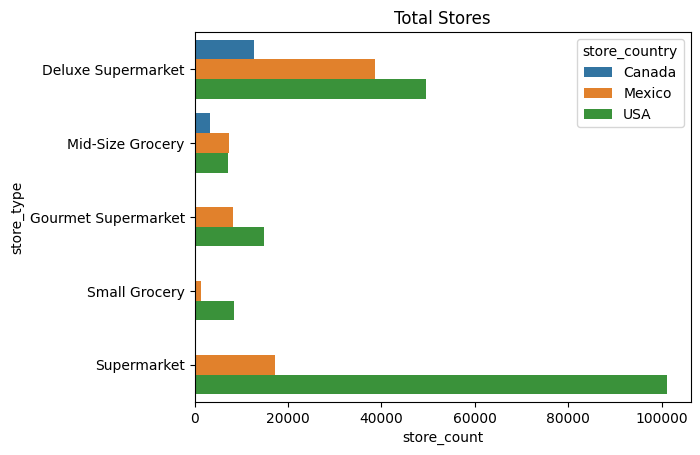

In [ ]:
## Let's plot the same data that we have collected in the previous step to get better understanding in which country we have the maximum number of stores and there type as well
## and where we have to work and set up more stores.

sns.barplot(data=country_store,y='store_type',x='store_count',hue='store_country')
plt.title('Total Stores')
plt.show()

In [ ]:
## Let's try to fetch details regarding in which state there is maximum number of stores available.

pd.merge(stores,region,'left').loc[:,['store_id','sales_region']].groupby('sales_region').count().rename({'store_id':'Total_stores'},axis=1).\
sort_values(by='Total_stores',ascending=False)

,Total_stores
sales_region,
North West,9
Mexico Central,6
South West,3
Canada West,2
Mexico West,2
Central West,1
Mexico South,1


In [ ]:
## member card analysis
customers.loc[:,['member_card','customer_id']].groupby('member_card').count().\
rename({'customer_id':'customer_count'},axis=1).sort_values(by='customer_count',ascending=False)

,customer_count
member_card,
Bronze,5703
Normal,2420
Golden,1198
Silver,960


Descriptive statistics analysis


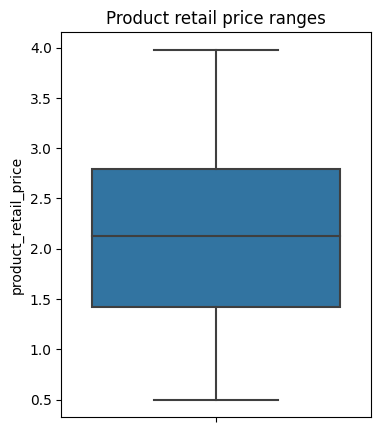

In [ ]:
## In this step I'm using seaborn package to create a box plot to show case the range of the retail prices it shows all the details like maximum,minimum and all three quartiles

fig, ax = plt.subplots(figsize=(4,5))
sns.boxplot(data=product,y='product_retail_price')
plt.title('Product retail price ranges')
plt.show()

In [ ]:
import statistics as st

In [ ]:
## average of product weight
st.mean(product.product_weight)

13.804820512820513

In [ ]:
## This provides the variability in the product weight data
## In this step I have calculated Q1,Q2(mean),Q3 this shows the range of data

st.quantiles(np.round(product.product_weight))

[10.0, 14.0, 18.0]

In [ ]:
## country state wise analysis
## In this step I'm counting total number of customers in each country state wise.

customers.loc[:,['customer_country','customer_state_province','customer_id']].groupby(['customer_country','customer_state_province']).count().\
rename({'customer_id':'Total_customers'},axis=1)

Total_customers
customer_country customer_state_province                 
Canada           BC                                  1717
Mexico           DF                                   347
                 Guerrero                             106
                 Jalisco                              104
                 Mexico                                97
                 Oaxaca                                90
                 Sinaloa                               78
                 Veracruz                              93
                 Yucatan                               99
                 Zacatecas                            191
USA              CA                                  4222
                 OR                                  1051
                 WA                                  2086

In [ ]:
## In this step I'm converting the return date from string type to numpy datetime64 type

returns['return_date']=returns.return_date.astype(np.datetime64)
returns.set_index('return_date',inplace=True)

In [ ]:
## In this step I'm calculating the what percentage of total return constituted by each year
## We can clearly see that as the sales increases the returns of the product also increases upto 68% of the total returns is from the year 1998 and 32% of the returns is
## from the year 1997.

returns=returns.assign(year=lambda x : x.index.year)
returns_yearly=returns.loc[:,['year','quantity']].groupby('year').sum()
returns_yearly['Total_percentage']=returns_yearly.assign(Total_percentage=lambda x : x.quantity/x.quantity.sum()*100).round(2).Total_percentage.astype(str) + '%'
returns_yearly

,quantity,Total_percentage
year,,
1997,2638,31.83%
1998,5651,68.17%


In [ ]:
## In this step I'm converting the first_opened_date and last remodel date from string to datetime datatype.

stores[['first_opened_date','last_remodel_date']]=stores.loc[:,['first_opened_date','last_remodel_date']].astype(np.datetime64)


In [ ]:
from datetime import datetime
from datetime import date

In [ ]:
## In this step I'm calculating the difference between first opened and last remodel and grouping the data on the basis store type.

last_remodel=stores.assign(difference=lambda x : x.last_remodel_date-x.first_opened_date).\
loc[:,['store_id','region_id','store_type','first_opened_date','last_remodel_date','difference']]

last_remodel.loc[:,['store_type','difference']].groupby('store_type').mean()

,difference
store_type,
Deluxe Supermarket,6044 days 16:00:00
Gourmet Supermarket,2075 days 12:00:00
Mid-Size Grocery,2518 days 18:00:00
Small Grocery,3177 days 18:00:00
Supermarket,2294 days 06:00:00


In [ ]:
## Let's find the average store size and also count the numbers of stores greater than the average of all the stores in each of the store types.

above_avgsqft=stores.loc[stores.total_sqft>stores.total_sqft.mean()]

above_avgsqft.loc[:,['store_type','store_id']].groupby('store_type').count()

,store_id
store_type,
Deluxe Supermarket,4
Mid-Size Grocery,4
Small Grocery,1
Supermarket,3


In [ ]:
## In this step I'm joining total_transactions with the product table to get better insights about the profits and total revenue generated from each product and brands in
## all these years.

## For this I'm calculating 3 new columns using assign method 1) Total_revenue=quantity * product_retail_price , 2)Quarter , 3)Year

total_transactions.reset_index(inplace=True)

Revenue_comp=pd.merge(total_transactions,product,'left').loc[:,['transaction_date','product_id','customer_id','quantity','product_retail_price']].set_index('transaction_date').\
assign(Total_revenue= lambda x : x.quantity * x.product_retail_price).\
assign(Quarter=lambda x : x.index.quarter).\
assign(Year= lambda x : x.index.year)


In [ ]:
## Joining the data from the above step with the customers table using left join to perform various analysis regarding the revenue.

Revenue_comp=pd.merge(Revenue_comp,customers,'left').loc[:,['product_id','customer_id','quantity','product_retail_price','Total_revenue','Quarter','Year','gender','member_card',
                                              'occupation','yearly_income']]

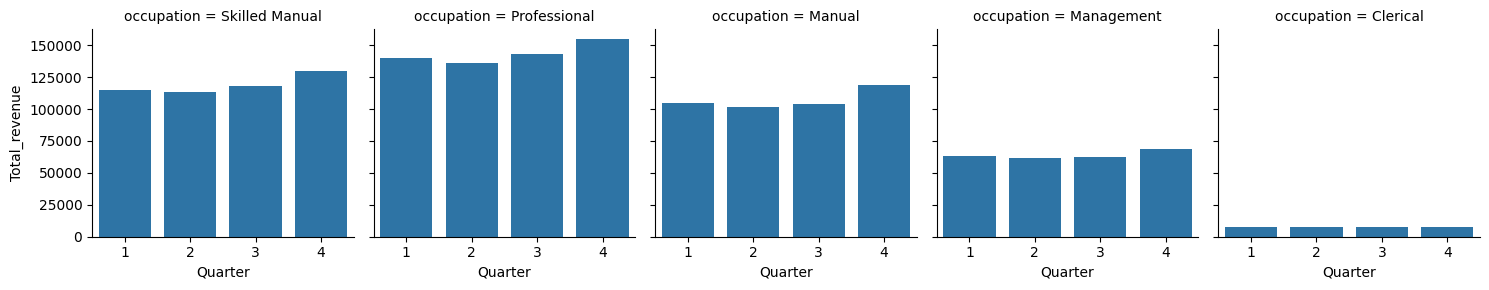

In [ ]:
## In this step I'm using seaborn package and facet grid method to represent the total revenue generated by each occupation customers in different quarters in all these years.
## Result : We can clearly see that we generate the maximum amount of revenue from the professionals and the least is from the clerical customers.

data=sns.FacetGrid(Revenue_comp,col='occupation')
data.map_dataframe(sns.barplot,x='Quarter',y='Total_revenue',errorbar=None,estimator=sum,saturation=0.8)
plt.show()

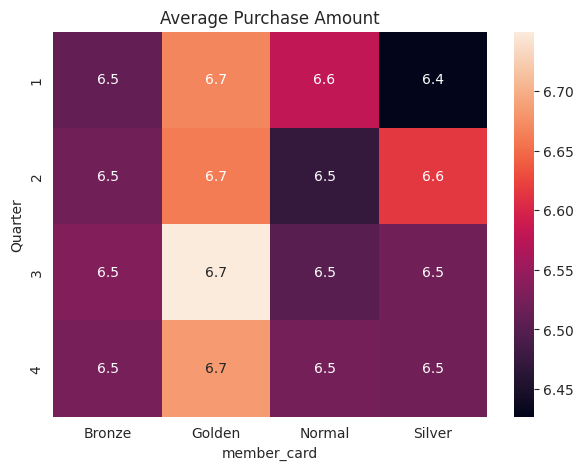

In [ ]:
## Here I'm using a heatmap to represent the average purchase price of different card holders in each quarters

revenue_cardwise=Revenue_comp.pivot_table(index='Quarter',columns='member_card',values='Total_revenue').sort_index(axis=0)
sns.set_style('white')
plt.figure(figsize=(7,5))
sns.heatmap(revenue_cardwise,annot=True)
plt.title('Average Purchase Amount')
plt.show()

<Axes: xlabel='gender', ylabel='Total_revenue'>

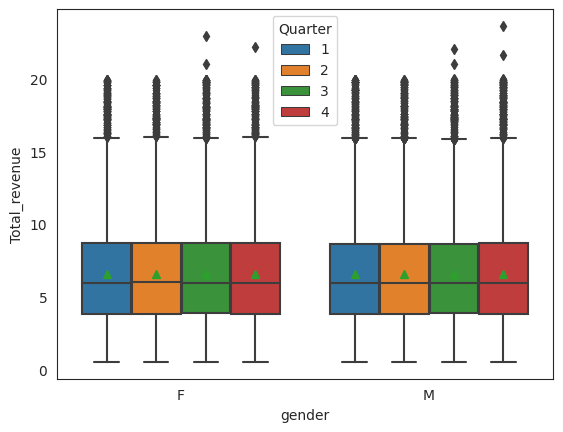

In [ ]:
sns.boxplot(data=Revenue_comp,x='gender',y='Total_revenue',showmeans=True,hue='Quarter')

<Axes: xlabel='Total_revenue', ylabel='Density'>

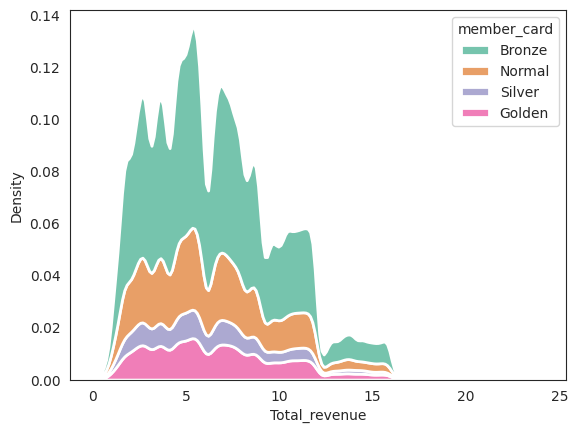

In [ ]:
## Here I'm using a kde plot to show the total revenue generation by different card holders

sns.kdeplot(Revenue_comp,x='Total_revenue',bw_adjust=0.6,hue='member_card',multiple='stack',linewidth=2,palette='Dark2',alpha=0.6)